In [60]:
import numpy as np
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


In [61]:
#Reading the data
data = pd.read_csv('diabetic_data.csv')

In [62]:
data.shape

(101766, 50)

In [63]:
# data contains 50 columns and 101766 rows.

In [64]:
data.columns
#displaying the column names

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [65]:
#Description of variables

#The dataset used covers ~50 different variables to describe every hospital diabetes admission. 
#In this section we give an overview and brief description of the variables in this dataset.

#Patient identifiers

#encounter_id is a unique identifier for each admission, and patient_nbr uniquely identifies each patient

#Patient Demographics

#race, age, gender, weight cover the basic demographic information associated with each patient.  
#Payer_code is an additional variable that identifies which health insurance (Medicare /Medicaid / Commercial) the patient holds.

#Admission and discharge details

#admission_source_id and admission_type_id identify who referred the patient to the hospital (e.g. physician vs. emergency dept.)
#and what type of admission this was (Emergency vs. Elective vs. Urgent). And  discharge_disposition_id indicates where the 
#patient was discharged to after treatment.

#Patient Medical History

#num_outpatient: number of outpatient visits by the patient in the year prior to the current encounter
#num_inpatient: number of inpatient visits by the patient in the year prior to the current encounter
#num_emergency: number of emergency visits by the patient in the year prior to the current encounter

#Patient admission details

#medical_specialty: the specialty of the physician admitting the patient
#diag_1, diag_2, diag_3: ICD9 codes for the primary, secondary and tertiary diagnoses of the patient. 
#                        ICD9 are the universal codes that all physicians use to record diagnoses. There are various easy to use 
#                        tools to lookup what individual codes mean (Wikipedia is pretty decent on its own)

#time_in_hospital: the patient's length of stay in the hospital (in days)
#number_diagnoses: Total no. of diagnosis entered for the patient
#num_lab_procedures: No. of lab procedures performed in the current encounter
#num_procedures: No. of non-lab procedures performed in the current encounter
#num_medications: No. of distinct medications prescribed in the current encounter

#Clinical Results

#max_glu_serum: indicates results of the glucose serum test
#A1Cresult: indicates results of the A1c test

#Medication Details

#diabetesMed: indicates if any diabetes medication was prescribed
#change: indicates if there was a change in diabetes medication
#24 medication variables: indicate whether the dosage of the medicines was changed in any manner during the encounter

#Readmission indicator
#    Indicates whether a patient was readmitted after a particular admission. 
#    There are 3 levels for this variable: “NO” = no readmission, “< 30” = readmission within 30 days and 
#    “> 30” = readmission after more than 30 days. The 30 day distinction is of practical importance to 
#    hospitals because federal regulations penalize hospitals for an excessive proportion of such readmissions. 
#    The event of interest is readmitted within < 30 days.

In [66]:
data.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [68]:
# Replacing the unknown '?' values with Nan
data.replace('?' , np.NaN, inplace=True)

In [69]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [70]:
# Droppping the 2 columns that have the same constant value='NO'
data.drop(['citoglipton','examide'], axis=1, inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [72]:
#5 point summary stats
id_columns = ['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']
#The above columns are droped because these are only certain numbers for identification
data.drop(columns = id_columns).describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


In [73]:
# Inference from the summary Statistics:
#   - The min time spent in hospital is 1 day while max is 14 days. Median being 4
#   - Few patients had to go thru a number of lab procedures, as high as 132
#   - Medications for few patients are as high as 81
#   - Patients have have visited the hospitals as outpatient for as much as 42
#   - Emergency visits are also high for some cases - 76

In [74]:
#Converting the object data type to Category data type
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category') 
    else:
        pass

In [75]:
#The following 3 numeric columns are actually category type. Data types are converted below 
data.admission_type_id = data.admission_type_id.astype('category')
data.discharge_disposition_id = data.discharge_disposition_id.astype('category')
data.admission_source_id = data.admission_source_id.astype('category')

In [76]:
#Checking if the conversions are proper
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient 

## Visualisation and analysis of missing values:

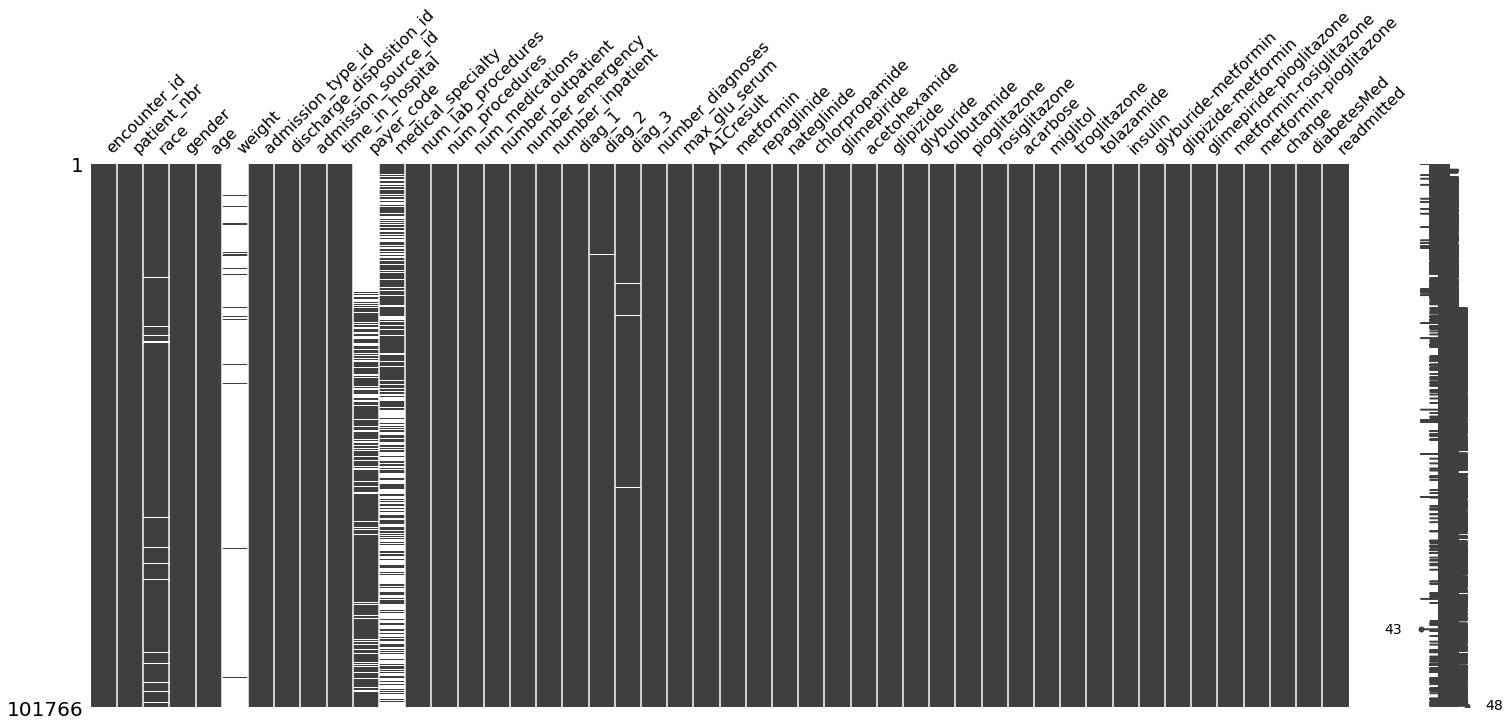

In [77]:
mn.matrix(data)

In [78]:
# Columns which contains missing values are race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3

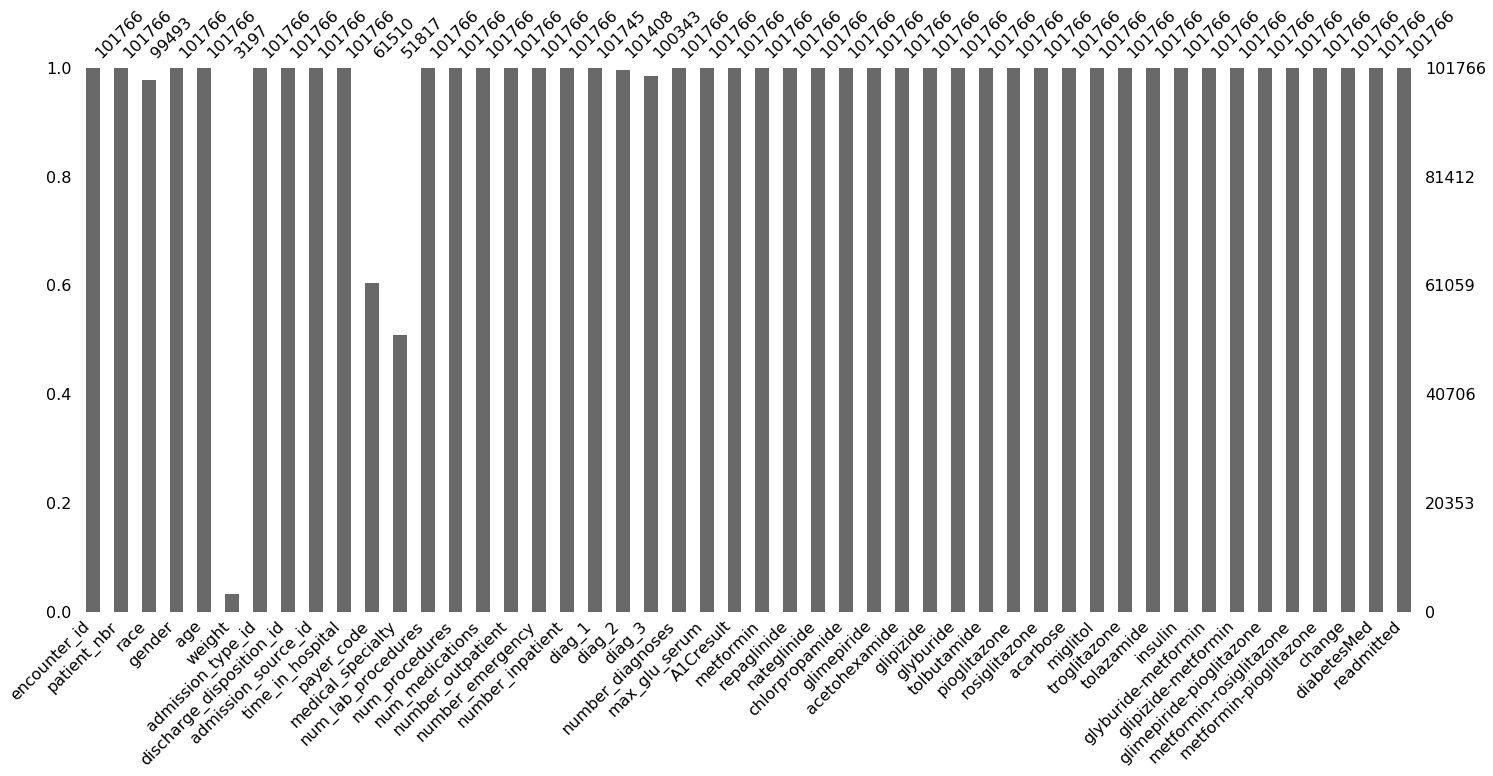

In [79]:
mn.bar(data)

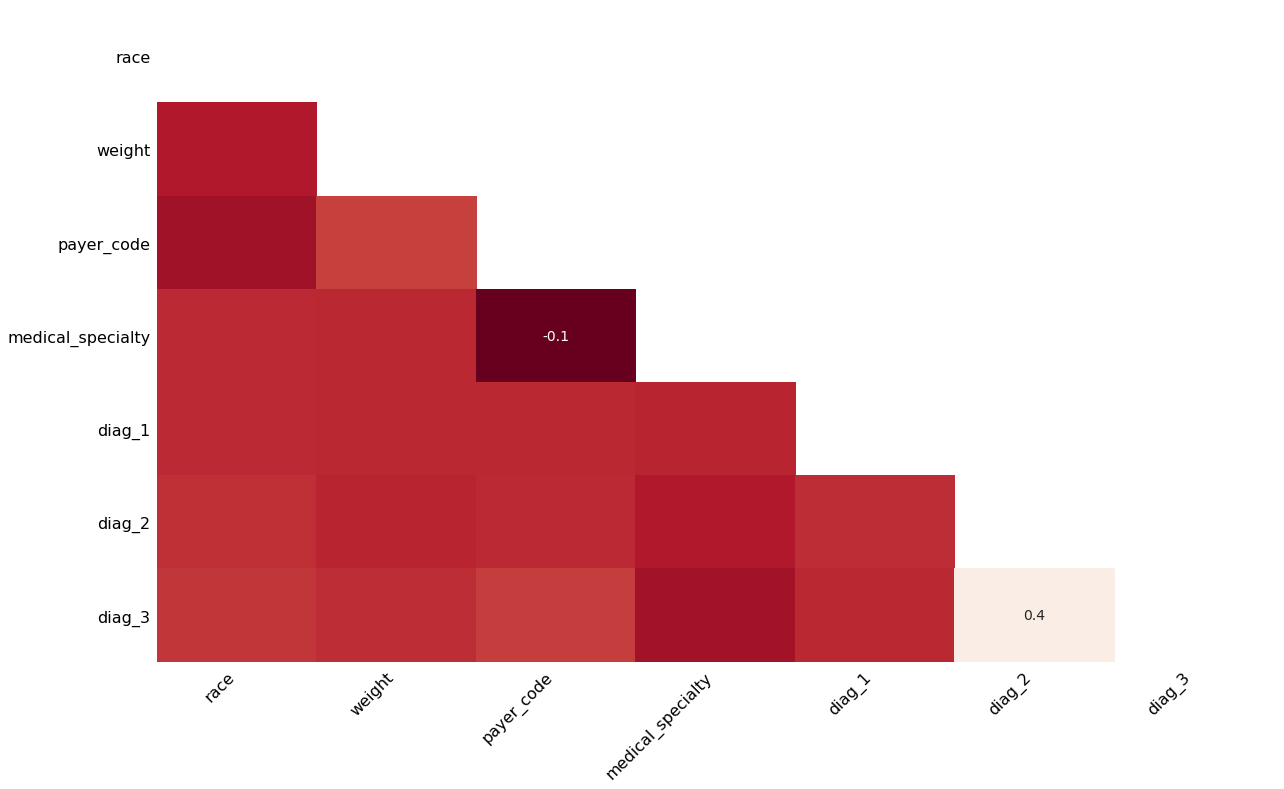

In [80]:
mn.heatmap(data)

In [81]:
# Any columns that are 100% populated do not show up in this matrix, which is why we see the 7 columns that we do. 

# We see the correlation value of -0.1 between the Payer_code and Medical_Specialty columns. A correlation of -1 means if one 
# column has a value, the other NEVER has a value. A correlation of 1 means if one column has a value the other 
# ALWAYS has a value. The value we see between Medical_specialty and Payer_code means roughly: more often than not, patients
# that have a diag_2 have an diag_3.


# If there are shaded boxes in the heatmap with no numbers, that means the correlation is very close to (but not exactly) 0, 
# meaning there is no relationship at all between the presense of the variables. In this case, and based upon the fact 
# we didn't see missing values for these columns in the matrix, we can assume there are a small number of missing values
# for these columns and they're randomly distributed.

#### Checking the percentage data missing in each column

In [82]:
#data.race = data.race.replace(np.NaN, 'Race-Missing')
data.race = data.race.replace(np.NaN, 'Race-Missing')
data.race = data.race.astype('category')

In [83]:
# drop the Weight column

# A lot of missing values are there (97%).
#Large percentage of missing values of the weight attribute can be explained by the fact that prior to the HITECH legislation
#of the American Reinvestment and Recovery Act in 2009 hospitals and clinics were not required to capture it in a structured
#format.

data.drop('weight', axis = 1, inplace= True)



In [84]:
# A large percentage of payer code is missing (40%)
# We will drop this column as its not related to whether diabetes readmission happens or not

data.drop('payer_code', axis = 1, inplace= True)

In [85]:
# 49% of medical speciality is missing.
# We will replace the missing values with a new class - Speciality_Missing
data.medical_specialty = data.medical_specialty.replace(np.NaN, 'Speciality_Missing')

In [86]:
#Checking the target class proportion
data.readmitted.value_counts(normalize = True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

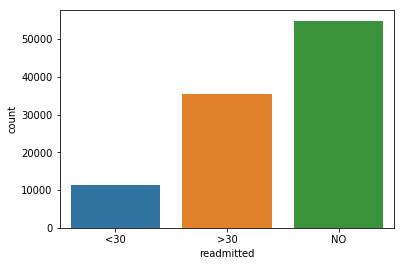

In [87]:
sns.countplot(data.readmitted)

Readmitted Columns :

In [88]:
data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [89]:
data.readmitted=data.readmitted.map({'<30':1,'>30':0,'NO':0})

In [90]:
data.readmitted.dtype

dtype('int64')

In [91]:
data.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

Gender Imputation:

In [92]:
data.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [93]:
#data[data['gender']=='Unknown/Invalid']

In [94]:
#data.drop([30506, 75551, 82573 ], axis=0, inplace=True)
data = data[data.gender != 'Unknown/Invalid']


In [95]:
data.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        0
Name: gender, dtype: int64

In [96]:
data.isna().sum()

encounter_id                   0
patient_nbr                    0
race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamid

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 46 columns):
encounter_id                101763 non-null int64
patient_nbr                 101763 non-null int64
race                        101763 non-null category
gender                      101763 non-null category
age                         101763 non-null category
admission_type_id           101763 non-null category
discharge_disposition_id    101763 non-null category
admission_source_id         101763 non-null category
time_in_hospital            101763 non-null int64
medical_specialty           101763 non-null object
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            101763 non-null int64
diag_1                      101742 non-null category
diag_2           

In [98]:
# 
# Mapping the categorical age column to continuous values for better representation in the model
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
data['age'] = data.age.map(age_dict)
data['age'] = data['age'].astype('int64')

### Re-Binning of diag1, diag2, diag3.

In [99]:
# create a duplicate of the diagnosis column
data['level1_diag1'] = data['diag_1']

# disease codes starting with V or E are in “other” category; so recode them to 0
data['level1_diag1']=np.where(data['level1_diag1'].str.contains('V'),0,data['level1_diag1'])
data['level1_diag1']=np.where(data['level1_diag1'].str.contains('E'),0,data['level1_diag1'])
# also replace the unknown values with -1
data['level1_diag1'] = data['level1_diag1'].fillna(99)
# Converting to float 
data['level1_diag1'] = data['level1_diag1'].astype('float')
# iterate and recode disease codes between certain ranges to certain categories
for index, row in data.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        data.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        data.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        data.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        data.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        data.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        data.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        data.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        data.loc[index, 'level1_diag1'] = 8
    else:
        data.loc[index, 'level1_diag1'] = 0
# convert this variable to float type to enable computations later
data['level1_diag1'] = data['level1_diag1'].astype(float)

In [100]:
# create a duplicate of the diagnosis column
data['level1_diag2'] = data['diag_2']

# disease codes starting with V or E are in “other” category; so recode them to 0
data['level1_diag2']=np.where(data['level1_diag2'].str.contains('V'),0,data['level1_diag2'])
data['level1_diag2']=np.where(data['level1_diag2'].str.contains('E'),0,data['level1_diag2'])
# also replace the unknown values with -1
data['level1_diag2'] = data['level1_diag2'].fillna(99)
# Converting to float 
data['level1_diag2'] = data['level1_diag2'].astype('float')
# iterate and recode disease codes between certain ranges to certain categories
for index, row in data.iterrows():
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        data.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        data.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        data.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        data.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        data.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        data.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        data.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        data.loc[index, 'level1_diag2'] = 8
    else:
        data.loc[index, 'level1_diag2'] = 0
# convert this variable to float type to enable computations later
data['level1_diag2'] = data['level1_diag2'].astype(float)

In [101]:
# create a duplicate of the diagnosis column
data['level1_diag3'] = data['diag_3']

# disease codes starting with V or E are in “other” category; so recode them to 0
data['level1_diag3']=np.where(data['level1_diag3'].str.contains('V'),0,data['level1_diag3'])
data['level1_diag3']=np.where(data['level1_diag3'].str.contains('E'),0,data['level1_diag3'])
# also replace the unknown values with -1
data['level1_diag3'] = data['level1_diag3'].fillna(99)
# Converting to float 
data['level1_diag3'] = data['level1_diag3'].astype('float')
# iterate and recode disease codes between certain ranges to certain categories
for index, row in data.iterrows():
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        data.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        data.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        data.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        data.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        data.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        data.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        data.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        data.loc[index, 'level1_diag3'] = 8
    else:
        data.loc[index, 'level1_diag3'] = 0
# convert this variable to float type to enable computations later
data['level1_diag3'] = data['level1_diag3'].astype(float)

In [102]:
data.drop(['diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 46 columns):
encounter_id                101763 non-null int64
patient_nbr                 101763 non-null int64
race                        101763 non-null category
gender                      101763 non-null category
age                         101763 non-null int64
admission_type_id           101763 non-null category
discharge_disposition_id    101763 non-null category
admission_source_id         101763 non-null category
time_in_hospital            101763 non-null int64
medical_specialty           101763 non-null object
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            101763 non-null int64
number_diagnoses            101763 non-null int64
max_glu_serum          

In [104]:
data.level1_diag1 = data.level1_diag1.astype('category')
data.level1_diag2 = data.level1_diag2.astype('category')
data.level1_diag3 = data.level1_diag3.astype('category')
data.readmitted = data.readmitted.astype('category')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 46 columns):
encounter_id                101763 non-null int64
patient_nbr                 101763 non-null int64
race                        101763 non-null category
gender                      101763 non-null category
age                         101763 non-null int64
admission_type_id           101763 non-null category
discharge_disposition_id    101763 non-null category
admission_source_id         101763 non-null category
time_in_hospital            101763 non-null int64
medical_specialty           101763 non-null object
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            101763 non-null int64
number_diagnoses            101763 non-null int64
max_glu_serum          

In [107]:
data.readmitted.value_counts()

0    90406
1    11357
Name: readmitted, dtype: int64

In [108]:
data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Race-Missing        2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [109]:
data.change.value_counts()

No    54754
Ch    47009
Name: change, dtype: int64

In [120]:
y=data['readmitted']
new_data = data.drop(['encounter_id','patient_nbr','readmitted'], axis = 1)

In [121]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [122]:
new_data.head().T

,0,1,2,3,4
age,5,15,25,35,45
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0
number_emergency,0,0,0,0,0
number_inpatient,0,0,1,0,0
number_diagnoses,1,9,6,7,5
race_Asian,0,0,0,0,0


In [124]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [154]:
def sel_function(X,y,n,m):
    a = list(combinations(X.columns,n)) #n = number of columns, #m = top m number of columns for analysis  
    mean = []
    std = []
    comb = []

    for i in range(len(a)):
        x = df[list(a[i])]
        y = y

        model = LogisticRegression()
        kfold = model_selection.KFold(n_splits=5, random_state=12345)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        mean.append(cv_results.mean())
        std.append(cv_results.std())
        comb.append(a[i])
        
    sd = pd.DataFrame({'combinations' : comb,'mean':mean,'std':std})
    sd = sd.sort_values(by='mean', ascending=False)
    tmp = sd.combinations.head(m)
    
    d = {}
    for i in tmp:
        for m in i:
            if m in d.keys():
                d[m]+=1
            else:
                d[m]=1
    col = list(d.keys())
    rep = list(d.values())
    top_columns = pd.DataFrame({'column':col,'repetitions':rep}).sort_values(by='repetitions', ascending=False)
    return top_columns, sd

In [155]:
new_data.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian',
       ...
       'level1_diag2_7.0', 'level1_diag2_8.0', 'level1_diag3_1.0',
       'level1_diag3_2.0', 'level1_diag3_3.0', 'level1_diag3_4.0',
       'level1_diag3_5.0', 'level1_diag3_6.0', 'level1_diag3_7.0',
       'level1_diag3_8.0'],
      dtype='object', length=216)

In [156]:
df = new_data[['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']]

In [165]:
a, b = sel_function(df,y,5,20)

In [166]:
a

,column,repetitions
2,number_outpatient,15
4,number_diagnoses,15
1,num_procedures,13
3,number_inpatient,13
0,age,12
5,num_lab_procedures,12
7,num_medications,12
6,number_emergency,6
8,time_in_hospital,2


In [167]:
b

,combinations,mean,std
63,"(age, num_procedures, number_outpatient, numbe...",0.888457,0.003658
53,"(age, num_lab_procedures, number_outpatient, n...",0.888427,0.003684
111,"(num_lab_procedures, num_procedures, number_ou...",0.888427,0.003614
124,"(num_procedures, number_outpatient, number_eme...",0.888427,0.003514
58,"(age, num_procedures, num_medications, number_...",0.888417,0.003672
65,"(age, num_medications, number_outpatient, numb...",0.888407,0.003673
117,"(num_lab_procedures, num_medications, number_o...",0.888407,0.003640
113,"(num_lab_procedures, num_procedures, number_ou...",0.888398,0.003701
40,"(age, num_lab_procedures, num_procedures, numb...",0.888398,0.003708
122,"(num_procedures, num_medications, number_outpa...",0.888398,0.003690


In [168]:
b.combinations[0]

('age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications')

In [169]:
b.combinations[2]

('age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'number_emergency')